## Exercise 2.4 Construct a solution of the following two point boundary value problem:
$$
-u''(x) = f(x)\qquad x \in(0,1),\qquad u(0) = \alpha,\qquad u(1) = \beta,
$$
## From equation 2.6 we know that the general solution to the 1-D Poisson equation is
$$
u(x) = c_{1} + c_{2}x - \int_{x}^{0}(x-y)f(y)dy
$$
## Applying boundary conditions
$$
u(0) = c_{1} = \alpha\\
u(1) =\alpha+ c_{2} - \int_{0}^{1}(1-y)f(y)dy = \beta\\
c_{2} = \beta - \alpha + \int_{0}^{1}(1-y)f(y)dy\\
u(x) = \alpha  + x(\beta - \alpha + \int_{0}^{1}(1-y)f(y)dy)-\int_{0}^{1}(1-y)f(y)dy\\
$$



## Exercise 2.5 Find a Green's function for the following two-point boundary value problem:
$$
-u''(x)=f(x),\qquad x \in (0,1), u(0) = 0, u'(1) = 0.
$$
## We use the code from problem 2.3 but with a new coefficient matrix, as $u_{+}'(1) = 0$. According to the notation used, this means that $c_{4} = 0$, and $c_{2} = 1$. The new matrix is 
$$
\left\{
        \begin{array}{rrrrrrrrrr}
            c_1 &+& ac_2 & &  & &   &=& 0, \\
            c_1 &+& yc_2 &-& c_3 &-& yc_4 &=& 0,\\
                & & c_2  & &     & &  &=& 1, \\
                & &      & &  & & c_4 &=& 0,
        \end{array}
    \right.
$$

In [4]:
import sympy as sp #Similar to symbolic toolbox in Matlab

a, b, x, y = sp.symbols('a, b, x, y')
c1, c2, c3, c4 = sp.symbols('c1, c2, c3, c4')

A = sp.Matrix(([1, a, 0, 0],[1, y, -1, -y],[0,1,0,0],[0,0,0,1]))

data = sp.Matrix([0,0,1,0])

c = sp.linsolve((A, data), c1,c2,c3,c4)
print c

{(-a, 1, -a + y, 0)}


In [5]:
print sp.simplify(-a +  x)

print sp.simplify(-a+y + 0)

-a + x
-a + y


### The Green's function

From the above computation, we see that
$$
    \large G(x,y) = \left\{ \begin{array}{rr}
                                x, & x<y, \\
                                y, & y\leq x.
                            \end{array}
                    \right.
$$

## Repeat exercise 2.6 for the following problem involving periodic boundary conditions:
$$
-u''(x) = f(x),\qquad x\in(0,1),\qquad u'(0) = u'(1), \qquad u(0) = u(1).
$$
## (a) Show that the condition
$$
\int_{0}^{1} f(x)dx = 0
$$
## is necessary in order for this problem to have a solution
## Applying the fundamental theorem of calculus to the Poission equation leads to
$$
u'(y) = u'(0) + \int_{0}^{y}u''(z)dz\\
u'(y) = u'(0) - \int_{0}^{y}f(z)dz
$$
## Applying the boundary conditions we see that
$$
u'(1) = u'(0)-\int_{0}^{1}f(z)
$$
## So $\int_{0}^{1}f(z)$ must equal zero for the boundary condition $u'(0) = u'(1)$ to hold.

## (b) Assume that u is a solution and define v(x) = u(x) + c, where c is some given constant. Is v a solution of the problem? Is the solution of the problem unique?
$$
v(x) = u(x) +c
$$
## From the text we know that 
$$
u(x) = u(0) - \int_{0}^{x}(x-y)f(y)dy,
$$
## and from the boundary conditions we know that $u(1) = u(0)$, so
$$
u(1) = u(0) - \int_{0}^{1}(1-y)f(y)dy\\
\int_{0}^{1}(1-y)f(y)dy = 0\\
v(1) = u(1) +c = u(0) +c,
$$
## which  satisfies the first periodic boundary condition. Now look at the derivatives at the boundary.
$$
v'(x) = u'(x) = u'(0) - \int_{0}^{x}f(y)dy\\
v''(x)  = u''(x) = -f(x)
$$
## So v(x) satisfies all of the boundary conditions of u(x). The solution to the problem is not unique because $c-v(1) = u(1)$ , so c and v(1) can take on an infinite set of values that still satisfy the periodic boundary conditions.

## (c) Assume that $\int_{0}^{1} f(x)dx = 0$ is satisfied, show that the problem always has a solution. We know from the text that
$$
u(x) = u(0) - \int_{0}^{x}(x-y)f(y)dy\\
u(x) = u(0) - x\int_{0}^{x}f(y)dy + \int_{0}^{x}yf(y)dy
$$
## from the fundamental theorem of calculus,
$$
u'(x) = u'(0) - \int_{0}^{x}f(y)dy - xf(x) + xf(x)\\
u'(x) = u'(0) - \int_{0}^{x}f(y)dy\\
$$
## Applying boundary conditions
$$
u'(1) = u'(0)\\
\int_{0}^{1}f(y)dy = 0\\
u''(x) = -f(x),
$$
##  So solution always exists.
## Show that the solution is uniquely determined by the extra condition
$$
\int_{0}^{1}u(x)dx = 0.\\
\int_{0}^{1}v(x) = u(0) +c -\int_{0}^{1}\int_{0}^{x}(x-y)f(y)dydx = 0\\
c = \int_{0}^{1}\int_{0}^{x}(x-y)f(y)dydx - u(0)
$$

## so c is uniquely determined.

## Exercise 2.9
## Let U denote the solution of the problem
$$
-U''(x) = F(x),/qquad x \in(0,1),\qquad U(0) = U(0) = 0,
$$
## and show that.
$$
\|U-u\|_{\infty} \le \frac{1}{8}\|F-f\|_{\infty}
$$
## U is perturbed data due to a small errors in the measurements, so logically we should think about using a Taylor series to analyze the stability of the system with respect to small errors in the measurements. Using proposition 2.2
$$
\|u\|_{infty} \le \frac{1}{8}\|f\|_{infty}
$$
## we can show this directly.

## U(x) will have the same Green's functions as u(x), as the boundary conditions and internal conditions are the same. Employing this information
$$
U(x) - u(x) = \int_{0}^{1}G(x,y)(F(x) - f(x))dx\\
|U(x) - u(x)| \le \int_{0}^{1}G(x,y)|F(x) - f(x)|\\
$$
## Employing proposition 2.2
$$
|U(x) - u(x)| \le \frac{1}{8}\|F(x) - f(x\|_{\infty}\
$$
## Assuming that f(x) is a  continuous function, we can even show that the error in u(x)will be of the order of the error in the measurement
$$
F(x) = f(x+\epsilon x) = f(x) + \epsilon x f'(x) + O((\epsilon x)^2)
$$
## If f(x) is linear, then f'(x) is finite, and 
$$
F(x) - f(x)  \approx \epsilon x f'(x)\\
F(x) - f(x) = O(\epsilon x)
$$
## So the difference in the functions of the data is of the order of the error of the measurement.



## Project 2.1 A Numerical Method
## (a) Explain the derivation of the following approximation for the trapezoidal rule:
$$
\int_{a}^{b}F(x) \approx h(F(a)/2 + \sum_{i=1}^{n}F(x_{i}) +F(b)/2)
$$
## Where $n$ is an integer and $ h = (b-a)/(n+1)$, and $x_{i} = a + ih$.
## The trapezoidal rule approximates the area under a small curve, between two points a and b, by using the formula for a trapezoid
$$
\int_{a}^{b} f(x)dx \approx (b-a)(f(a) + f(b))/2
$$
## The accuracy of this approximation increases as the number of grip points increases, and the distance between internal points decrease, as this allows the approximation to account for curvature in a nonlinear function. If the interval $a\to b$ is broken up into $n+1$ increments, then $h  = (b-a)/(n+1)$ is the step size of the interval, and the integral can be approximated as the sum of of all the individual trapezoids that comprise the area under the curve.
$$
\int_{a}^{b} f(x)dx \approx \frac{(b-a)}{2(n+1)}(\sum_{i = 1}^{n+1}(f(x_{i+1}) + f(x_{i}))\\
\frac{(b-a)}{2(n+1)}(\sum_{i = 1}^{n+1}(f(x_{i+1}) + f(x_{i}))=\frac{(b-a)}{2(n+1)}(f(x_{1}) + 2f(x_{2})+2f(x_{3})+ 2f(x_{4})  +... f(x_{n+1}) )\\
\frac{(b-a)}{2(n+1)}(\sum_{i = 1}^{n+1}(f(x_{i+1}) + f(x_{i})) = \frac{(b-a)}{(n+1)}(f(x_{1})/2 +\sum_{i=1}^{n}f(x_{i})+  f(x_{n+1})/2 )
$$
## (b) Write a procedure that, for given $a,b,F(x),$ and $n$, computes the approximations defined by the general trapezoidal rule. 
## Please see below


In [ ]:
def trap(a,b,f,n):
    h = (b-a)/(n+1)
    intf = h*(f[0]/2 +f[1:n+1] +f[0]/2)
    return intf


## (c) Solve the following integrals analytically.
$$
\int_{0}^{1}x^5dx\qquad \int_{0}^{1} \sqrt{|x-\frac{1}{2}|}dx
$$
## and provide numerical approximations by using the trapezoidal rule for some values of n, say n = 10,20,40. Use the technique derived in project 1.1 above to estimate the rate of convergence of these integrals. 
## Analytical solutions:
$$
\int_{0}^{1}x^5dx\qquad = \frac{1}{6}x^6\\
\int_{0}^{1} \sqrt{|x-\frac{1}{2}|}dx = \int_{0}^{1/2}\sqrt{-x+\frac{1}{2}}dx+\int_{1/2}^{1}\sqrt{x-\frac{1}{2}}dx\\
\int_{0}^{1} \sqrt{|x-\frac{1}{2}|}dx = -\frac{2}{3}((-\frac{1}{2}+\frac{1}{2})^{3/2} -(\frac{1}{2})^{3/2}) +\frac{2}{3}(-(\frac{1}{2}-\frac{1}{2})^{3/2} +(1-\frac{1}{2})^{3/2} )\\
\int_{0}^{1} \sqrt{|x-\frac{1}{2}|}dx = \frac{\sqrt{2}}{3}
$$
## Provide numerical approximations in the box below.



Values for the integral of x^5 with increasing n: [ 0.15183735  0.15879713  0.16131795  0.16261655  0.16340801  0.16432386
  0.16534531  0.16583802  0.166003    0.16633408  0.16663334]
Error in computed integral with increasing n: [  1.48293171e-02   7.86953604e-03   5.34871463e-03   4.05011408e-03
   3.25866005e-03   2.34280683e-03   1.32135450e-03   8.28651016e-04
   6.63669323e-04   3.32583666e-04   3.33258337e-05]
 Convergence rate: [ 0.91410167  0.9523454   0.96673117  0.97439054  0.98066449  0.98770972
  0.99278707  0.99494284  0.99674727]


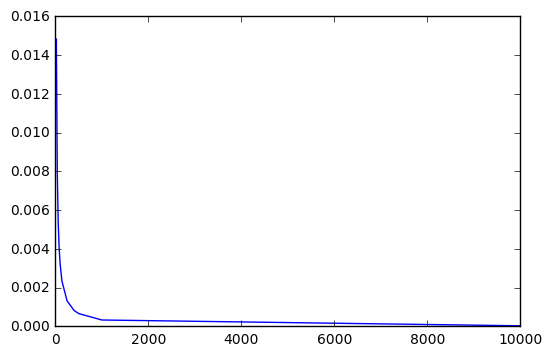

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def trap1(a,b,n):
     l = len(n)
     intf = np.zeros(len(n))
     for i in range(0,l): 
        h = (b-a)/(n[i]+1)
        inter = np.linspace(a,b,n[i])
        f = (inter)**5
        fsum = np.sum(f[1:n[i]-1])
        intf[i]= h*(f[0]/2 +fsum +f[n[i]-1]/2)
     return intf[0:len(n)]
a = 0.
b = 1.
n = np.array([20,40,60,80,100,140,250,400,500,1000,10000])
n1 = n.astype(float)
z1 = trap1(a,b,n)
err1 = np.abs(z1 - 1./6)
alpha = np.log(err1[1:-1]/err1[0:-2])/np.log(n1[0:-2]/n1[1:-1])
print 'Values for the integral of x^5 with increasing n:',z1
print 'Error in computed integral with increasing n:',err1
print ' Convergence rate:', alpha
plt.plot(n,err1)



In [15]:
def trap2(a,b,n):
     l = len(n)
     intf = np.zeros(len(n))
     for i in range(0,l): 
        h = (b-a)/(n[i]+1)
        inter = np.linspace(a,b,n[i])
        f = (np.abs(inter-0.5))**0.5
        fsum = np.sum(f[1:n[i]-1])
        intf[i]= h*(f[0]/2 +fsum +f[n[i]-1]/2)
     return intf[0:len(n)]
a = 0.
b = 1.
n = np.array([20,40,60,80,100,140,250])
z2 = trap2(a,b,n)
err2 = np.abs(z2 - 2**0.5/3)
alpha2 = np.log(err1[1:-1]/err1[0:-2])/np.log(n1[0:-2]/n1[1:-1])
print 'Values for the integral of (|x-1/2|)^0.5 with increasing n:',z2
print 'Error in computed integral with increasing n:',err2
print 'Convergence rate:', alpha2
print

Values for the integral of (|x-1/2|)^0.5 with increasing n: [ 0.42813454  0.44895849  0.45624128  0.45995247  0.46220274  0.4647972
  0.46768094]
Error in computed integral with increasing n: [ 0.04326998  0.02244603  0.01516324  0.01145205  0.00920178  0.00660732
  0.00372358]
Convergence rate: [ 0.91410167  0.9523454   0.96673117  0.97439054  0.98066449]



## The convergence rate for both integrals is linear, which indicates that the trapezoidal method has a linear rate of convergence. However, according to the literature the trapezoidal rule is supposed to converge quadratically as it takes into account all of the linear components.


## (d) Next we consider how to use this type of numerical integration in order to define an approximation to the solution u(x) of the original ODE given by the Green's function solution. Define the function
$$
\alpha(x) = \int_{0}^{x}f(y)dy \qquad \beta(x) = \int_{0}^{x}yf(y)dy,
$$
and show that u(x) is given both by
$$
u(x) = x(\alpha(1) - \beta(1)) + \beta(x) - x\alpha(x).
$$
## The Green's function solution is
$$
u(x) = x\int_{0}^{1}(1-y)f(y)dy - \int_{0}^{1}(x-y)f(y)dy
$$
## Rewrite the first and second integrals in terms of $\alpha$ and $\beta$.
$$
x\int_{0}^{1}(1-y)f(y)dy  = x\int_{0}^{1}f(y)dy - x\int_{0}^{1}yf(y)dy = x\alpha(1) - x\beta(1)\\
- \int_{0}^{1}(x-y)f(y)dy = -x\int_{0}^{1}f(y)dy + \int_{0}^{1}yf(y)dy = -x\alpha(x) + \beta(x)\\
u(x) = x(\alpha(1) - \beta(1)) + \beta(x) - x\alpha(x).
$$

## Define 
$$ 
\alpha_{i+1} = \alpha_{i} + \frac{h}{4}(f_{i} + 2 f_{i+1/2} + f_{i}),\\
\beta_{i+1} = \beta_{i} + \frac{h}{4}(x_{i}f_{i} + 2x_{i+1/2}f_{i+1/2} + x_{i}f_{i}),\\
$$
## Where
$$
x_{i} = ih = i/(n+1), \\
f_{i} = f(x_{i})\\
f_{i+1/2} = f(x_{i}+h/2)\\ 
$$
## and  $n \ge 1$ and is an integer.
## Because this scheme iterates in steps of $h/2$ there is a mesh length of $2(n+1)$, hence the $\frac{h}{4}$. If we make a change of variable and define $h = \frac{1}{2(n+1)}$ that will simplify writing out the equation. Let's look at the rest of the scheme though by writing out the first few terms for $\alpha$ and $\beta$. This changes the indexing a little for the alphas, as there are only even indices for the alpha values, but does not change anything in reality.
$$
\alpha_{2} = 0 + \frac{h}{2}(f(0) + 2f(h) + f(2h))\\
\alpha_{4} = \frac{h}{2}(f(0) + 2f(h) + f(2h) + \frac{h}{2}(f(2h) + 2f(3h) + f(4h))\\
\alpha_{4} = h(\frac{f(0)}{2} + f(h) + f(2h) +f(3h) +\frac{f(4h)}{2})\\
\alpha_{4} = h(\frac{f(0)}{2} + \sum_{i=1}^{3}f(ih) + \frac{f(4h)}{2})
$$
## This is the the trapezoidal scheme for $\alpha(x)$ for a mesh of size 4. We can generalize this and say that
$$
\alpha_{n} = h(\frac{f(0)}{2} + \sum_{i=1}^{n-1}f(ih) + \frac{f(nh)}{2})
$$
## which is an approximation to the integral form of $\alpha(x)$. A quick observation tells us that the same analysis can be applied to $\beta_{i}$ to show that it is the trapezoidal form of $\beta(x)$.So  $\alpha(x)\approx \alpha_{i}$ and  $\beta(x)\approx \beta_{i}$ 


## (f) Define
$$
u_{i} = x_{i}(\alpha_{n+1} - \beta_{n+1})+\beta_{i} - x_{i}\alpha_{i}
$$
## and put $u_{0} = u_{n+1} = 0$. Implement this in a computer, and compare this to the exact solutions computed in Example 2.1, Example 2.2, and Problem 2.2.

## Example 2.1 Comparison  - I evaluate the solutions to the ODE at the third point on the mesh, and then compare the value at that point on the mesh to the actualy value using error analysis. With the additional refinement to the mesh size, the system seems to converge quadratically.

The convergence rate with changing n is: [ 2.68350421  2.68134439  2.67918596  2.67702904  2.67487378  2.67272028
  2.67056865  2.66841902  2.66627148  2.66412613  2.66198308  2.65984239
  2.65770418  2.65556852  2.65343548  2.65130514  2.64917759  2.64705288
  2.64493108  2.64281225  2.64069646  2.63858376  2.63647421  2.63436786
  2.63226475  2.63016495  2.62806849  2.62597542  2.62388577  2.62179959
  2.61971691  2.61763779  2.61556222  2.61349028  2.61142197  2.60935733
  2.60729638  2.60523916  2.60318569  2.60113599  2.59909009  2.597048
  2.59500975  2.59297536  2.59094484  2.58891822  2.5868955   2.58487671
  2.58286186  2.58085095  2.57884402  2.57684105  2.57484209  2.5728471
  2.57085614  2.56886919  2.56688625  2.56490736  2.56293251  2.56096169
  2.55899494  2.55703223  2.55507358  2.55311901  2.55116849  2.54922206
  2.54727969  2.5453414   2.54340719  2.54147706  2.53955102  2.53762904
  2.53571114  2.53379735  2.53188761  2.52998196  2.52808038  2.52618289
  2.52428947 

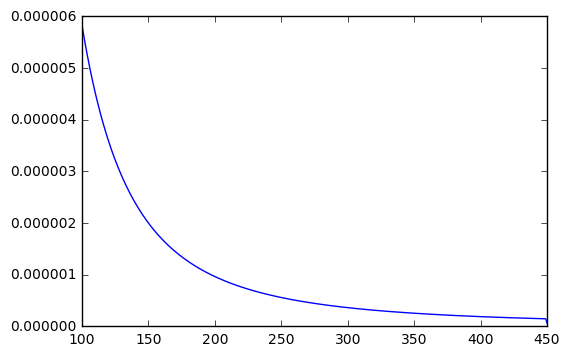

In [26]:
import numpy as np
def alpha(n):
    uapprox = np.zeros(len(n))
    real = np.zeros(len(n))
    for j in range(0,len(n)):
        x = np.zeros(n[j].astype(int))
        alpha = np.zeros(len(x))
        beta = np.zeros(len(x))
        u = np.zeros(len(x))
        f =np.ones(len(x))
        h = 1./(n[j]+1)
        for i in range(1, len(x)):
            x[i] = x[i-1]+h 
        real[j] = 0.5*x[3]*(1-x[3])
        for i in range(1,len(x),1):
            alpha[i] = alpha[i-1] + h/4*(f[i-1] +2 + f[i])
            beta[i] = beta[i-1] + h/4*(x[i-1]*f[i-1] +2*(x[i-1]+h/2) + x[i]*f[i])
        for i in range(0,len(x),1):
            u[i] = x[i]*(alpha[-1] - beta[-1]) + beta[i] - x[i]*alpha[i]
        uapprox[j]=u[3]
    return uapprox, real
n = np.linspace(100,450,350)
[num,real] = alpha(n)
err = np.abs(num-real)
alpha = np.log(err[0:-2]/err[1:-1])/np.log(n[1:-1]/n[0:-2])
print 'The convergence rate with changing n is:', alpha
alpha1 = np.log(np.abs(real[250]-num[250]))
print alpha1
plt.plot(n,err)

## Example 2.2 $f(x) = x$. This system appears to have a linear rate of convergence


The error with increasing n at point x[3] is: [ 0.00494038  0.00489199  0.00484453  0.00479799  0.00475233  0.00470753
  0.00466356  0.00462041  0.00457804  0.00453645  0.0044956   0.00445548
  0.00441607  0.00437735  0.0043393   0.00430191  0.00426516  0.00422902
  0.0041935   0.00415856  0.0041242   0.00409041  0.00405716  0.00402445
  0.00399226  0.00396058  0.0039294   0.0038987   0.00386848  0.00383873
  0.00380943  0.00378057  0.00375215  0.00372415  0.00369656  0.00366938
  0.0036426   0.0036162   0.00359018  0.00356454  0.00353926  0.00351433
  0.00348975  0.00346551  0.00344161  0.00341804  0.00339478  0.00337184
  0.00334921  0.00332688  0.00330484  0.00328309  0.00326163  0.00324045
  0.00321954  0.0031989   0.00317852  0.00315839  0.00313853  0.0031189
  0.00309953  0.00308039  0.00306149  0.00304281  0.00302437  0.00300614
  0.00298814  0.00297035  0.00295277  0.00293539  0.00291822  0.00290125
  0.00288447  0.00286789  0.0028515   0.00283529  0.00281926  0.00280342
  0.00

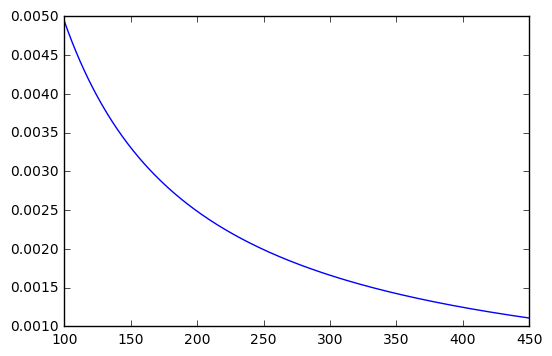

In [33]:
import numpy as np
def alpha(n):
    uapprox = np.zeros(len(n))
    real = np.zeros(len(n))
    for j in range(0,len(n)):
        x = np.zeros(n[j].astype(int))
        alpha = np.zeros(len(x))
        beta = np.zeros(len(x))
        u = np.zeros(len(x))
        h = 1./(n[j]+1)
        for i in range(1, len(x)):
            x[i] = x[i-1]+h           #Creating the mesh
        real[j] = 1/6*x[3]*(1-x[3]**2)      #Put the analytical solution here
        f = x         ##Insert the inhomogeneous function here
        for i in range(1,len(x),1):
            alpha[i] = alpha[i-1] + h/4*(f[i-1] +2*(x[i-1]+h/2) + f[i])
            beta[i] = beta[i-1] + h/4*(x[i-1]*f[i-1] +2*(x[i-1]+h/2)**2 + x[i]*f[i])
        for i in range(0,len(x),1):
            u[i] = x[i]*(alpha[-1] - beta[-1]) + beta[i] - x[i]*alpha[i] #iterative solution
        uapprox[j]=u[3]
    return uapprox, real
n = np.linspace(100,450,350)
[num,real] = alpha(n)
err = np.abs(num-real)
print 'The error with increasing n at point x[3] is:',err
alpha = np.log(err[1:-1]/err[0:-2])/np.log(n[0:-2]/n[1:-1])
print 'The convergence rate with changing n is:', alpha
plt.plot(n,err)

## Exercise 2.2 
## (a) $f(x) = x^2$. The exact solution is
$$
u(x) = x\int_{0}^{1}(1-y)y^2dy - \int_{0}^{x}(x-y)y^2dy\\
u(x) = x(\frac{1}{3} -\frac{1}{4}) - (\frac{1}{3}x^4 - \frac{1}{4}x^5)\\
u(x) =\frac{1}{4}x^5- \frac{1}{3}x^4 +x\frac{1}{12}
$$
## This system converges linearly as well, as is shown in the alpha table. The error decreases with decreasing mesh size

The error with increasing n is: [ 0.00493553  0.00488726  0.00483994  0.00479351  0.00474797  0.00470328
  0.00465943  0.00461638  0.00457412  0.00453262  0.00449187  0.00445185
  0.00441252  0.00437389  0.00433593  0.00429861  0.00426194  0.00422588
  0.00419043  0.00415556  0.00412127  0.00408754  0.00405436  0.00402171
  0.00398958  0.00395796  0.00392683  0.00389619  0.00386603  0.00383633
  0.00380708  0.00377827  0.00374989  0.00372194  0.0036944   0.00366726
  0.00364052  0.00361416  0.00358819  0.00356258  0.00353734  0.00351245
  0.0034879   0.0034637   0.00343983  0.00341629  0.00339307  0.00337016
  0.00334756  0.00332526  0.00330325  0.00328153  0.0032601   0.00323894
  0.00321806  0.00319744  0.00317709  0.00315699  0.00313714  0.00311755
  0.00309819  0.00307908  0.0030602   0.00304154  0.00302312  0.00300492
  0.00298693  0.00296916  0.00295159  0.00293424  0.00291709  0.00290013
  0.00288337  0.00286681  0.00285043  0.00283424  0.00281823  0.0028024
  0.00278675  0.0027

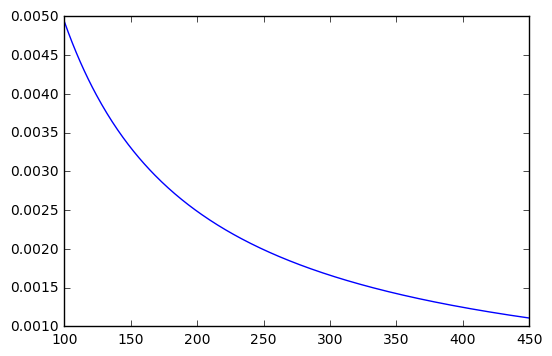

In [34]:
import numpy as np
def alpha(n):
    uapprox = np.zeros(len(n))
    real = np.zeros(len(n))
    for j in range(0,len(n)):
        x = np.zeros(n[j].astype(int))
        alpha = np.zeros(len(x))
        beta = np.zeros(len(x))
        u = np.zeros(len(x))
        h = 1./(n[j]+1)
        for i in range(1, len(x)):
            x[i] = x[i-1]+h           #Creating the mesh
        real[j] = 1/4*x[3]**5-1/3*x[3]**4 +1/12*x[3]      #Put the analytical solution here
        f = x**2         ##Insert the inhomogeneous function here
        for i in range(1,len(x),1):
            alpha[i] = alpha[i-1] + h/4*(f[i-1] +2*(x[i-1]+h/2) + f[i])
            beta[i] = beta[i-1] + h/4*(x[i-1]*f[i-1] +2*(x[i-1]+h/2)**3 + x[i]*f[i])
        for i in range(0,len(x),1):
            u[i] = x[i]*(alpha[-1] - beta[-1]) + beta[i] - x[i]*alpha[i] #iterative solution
        uapprox[j]=u[3]
    return uapprox, real
n = np.linspace(100,450,350)
[num,real] = alpha(n)
err = np.abs(num-real)
print 'The error with increasing n is:',err
alpha = np.log(err[0:-2]/err[1:-1])/np.log(n[1:-1]/n[0:-2])
print 'The convergence rate with changing n is:', alpha
plt.plot(n,err)

## Exercise 2.2 
## (b) $f(x) = e^x$. The exact solution is
$$
u(x) = x\int_{0}^{1}(1-y)e^ydy - \int_{0}^{x}(x-y)e^ydy\\
u(x) = x(e^1-1) -ye^y|_{ 0 \to 1} +\int_{0}^{1}e^ydy -x(e^x-1) +ye^y|_{0\to x} -\int_{0}^{x}e^y\\
u(x) = x(e^1-e^x)
$$
## and it has linear convergence as well.

The error with increasing n is: [ 0.04642028  0.04597653  0.04554117  0.04511397  0.04469471  0.04428316
  0.04387912  0.04348238  0.04309275  0.04271003  0.04233405  0.04196463
  0.04160159  0.04124478  0.04089403  0.0405492   0.04021013  0.03987668
  0.03954871  0.03922609  0.03890869  0.03859638  0.03828904  0.03798656
  0.03768882  0.0373957   0.03710711  0.03682294  0.03654308  0.03626744
  0.03599593  0.03572845  0.03546492  0.03520525  0.03494934  0.03469713
  0.03444854  0.03420348  0.03396187  0.03372366  0.03348877  0.03325712
  0.03302865  0.0328033   0.03258101  0.03236171  0.03214533  0.03193183
  0.03172115  0.03151323  0.03130801  0.03110545  0.0309055   0.03070809
  0.0305132   0.03032076  0.03013073  0.02994307  0.02975773  0.02957467
  0.02939384  0.02921522  0.02903875  0.0288644   0.02869213  0.02852191
  0.02835369  0.02818744  0.02802314  0.02786073  0.0277002   0.02754151
  0.02738462  0.02722951  0.02707615  0.0269245   0.02677455  0.02662625
  0.02647959  0.026

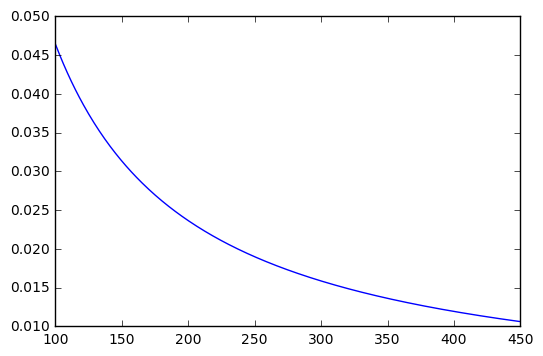

In [36]:
import numpy as np
def alpha(n):
    uapprox = np.zeros(len(n))
    real = np.zeros(len(n))
    for j in range(0,len(n)):
        x = np.zeros(n[j].astype(int))
        alpha = np.zeros(len(x))
        beta = np.zeros(len(x))
        u = np.zeros(len(x))
        h = 1./(n[j]+1)
        for i in range(1, len(x)):
            x[i] = x[i-1]+h           #Creating the mesh
        real[j] = x[3]*(np.exp(1)-np.exp(x[3]))     #Put the analytical solution here
        f = np.exp(x)        ##Insert the inhomogeneous function here
        for i in range(1,len(x),1):
            alpha[i] = alpha[i-1] + h/4*(f[i-1] +2*(x[i-1]+h/2) + f[i])
            beta[i] = beta[i-1] + h/4*(x[i-1]*f[i-1] +2*(x[i-1]+h/2)*np.exp(x[i-1]+h/2) + x[i]*f[i])
        for i in range(0,len(x),1):
            u[i] = x[i]*(alpha[-1] - beta[-1]) + beta[i] - x[i]*alpha[i] #iterative solution
        uapprox[j]=u[3]
    return uapprox, real
n = np.linspace(100,450,350)
[num,real] = alpha(n)
err = np.abs(num-real)
print 'The error with increasing n is:',err
alpha = np.log(err[0:-2]/err[1:-1])/np.log(n[1:-1]/n[0:-2])
print 'The convergence rate with changing n is:', alpha
plt.plot(n,err)

## Discuss the results with respect to trapezoidal rule theory.
## The only integral that converged quadratically was the integral which contained the inhomogeneous function $f(x) = 1$. The most obvious explanation for the this integral to have quadratic convergence is because the integral itself was linear,and the trapezoidal rule is intended to evaluate linear integrals. All of the other inhomogeneous functions resulted in a nonlinear integral, which requires a higher order approximation to ensure faster than linear convergence.
## Discuss another numerical method that can be used once the maximum resolution of the data has been reached, and the mesh size cannot be made any smaller.
## Spline interpolation may be helpful, or a higher order order numerical method like Guassian quadrature to ensure faster convergence.